# Load libraries

In [1]:
from sklearn import linear_model
from sklearn import metrics


# common visualization module
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# numeric library
import numpy as np
import os
import pandas as pd
from time import time as timer


import statsmodels.api as sm
from patsy import dmatrices
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from datetime import date
import glob
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from scipy import stats
from scipy.stats import poisson


# Load Data

In [808]:
# Load Data
df_all=pd.read_csv(r'C:..\Raw_Data_5.csv') #get data from gitub repository / filename 'Raw_Data_5.csv'

In [809]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 98 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Match date                               755 non-null    object 
 1   Matches                                  755 non-null    object 
 2   Team                                     755 non-null    object 
 3   InStat Index                             755 non-null    int64  
 4   Goals                                    755 non-null    int64  
 5   Chances                                  755 non-null    int64  
 6   Chances successful                       755 non-null    int64  
 7   Fouls                                    755 non-null    int64  
 8   Yellow cards                             755 non-null    int64  
 9   Red cards                                755 non-null    int64  
 10  Tactics                                  755 non-n

# Data Cleaning

In [ ]:
#convert the date of the data set into usable date format
df_all['Match date']=pd.to_datetime(df_all['Match date'], format='%d/%m/%y', infer_datetime_format=True, dayfirst=True)
df_all = df_all.sort_values('Match date')
df_all = df_all.reset_index(drop=True)
df_all.info()

In [734]:
#Convert the 'home_away' into categorical columns
g_status=pd.get_dummies(df_all['home_Away'],drop_first=True)

# Drop the impacted coulmn from the dataset
df_all=df_all.drop('home_Away',axis=1)

# Add the dummy-states independent variables
df_all=pd.concat([df_all,g_status],axis=1)
df_all=df_all.rename(columns={'h':'Game_Status'})
#df_all.head()


In [735]:
#convert data to percent to have compareable dta format with other already existing ratios
df_all['chances_cr']=df_all['Chances successful']/df_all['Chances']
df_all['shots_cr']=df_all['Shots on target']/df_all['Shots']
df_all['key_passes_cr']=df_all['Key passes accurate']/df_all['Key passes']

#convert percentages numbers to float in order to have the right data format
df_all['Accurate crosses'] = df_all['Accurate crosses, %'].str.rstrip('%').astype('float') / 100.0
df_all['Challenges won'] = df_all['Challenges won, %'].str.rstrip('%').astype('float') / 100.0
df_all['Challenges in defence won'] = df_all['Challenges in defence won, %'].str.rstrip('%').astype('float') / 100.0
df_all['Challenges in attack won'] = df_all['Challenges in attack won, %'].str.rstrip('%').astype('float') / 100.0
df_all['Air challenges won'] = df_all['Air challenges won, %'].str.rstrip('%').astype('float') / 100.0
df_all['Successful dribbles'] = df_all['Successful dribbles, %'].str.rstrip('%').astype('float') / 100.0
df_all['Tackles won'] = df_all['Tackles won, %'].str.rstrip('%').astype('float') / 100.0
df_all['Pressing efficiency'] = df_all['Pressing efficiency, %'].str.rstrip('%').astype('float') / 100.0
df_all['Ball possession'] = df_all['Ball possession, %'].str.rstrip('%').astype('float') / 100.0
df_all['Successful actions'] = df_all['Successful actions, %'].str.rstrip('%').astype('float') / 100.0
df_all['efficiency for positional attacks'] = df_all['% of efficiency for positional attacks'].str.rstrip('%').astype('float') / 100.0
df_all['efficiency for counterattacks'] = df_all['% of efficiency for counterattacks'].str.rstrip('%').astype('float') / 100.0
df_all['efficiency for set-piece attacks'] = df_all['% of efficiency for set-piece attacks'].str.rstrip('%').astype('float') / 100.0
df_all['efficiency for free-kick attacks'] = df_all['% of efficiency for free-kick attacks'].str.rstrip('%').astype('float') / 100.0
df_all['efficiency for corner attacks'] = df_all['% of efficiency for corner attacks'].str.rstrip('%').astype('float') / 100.0
df_all['efficiency for throw-in attacks'] = df_all['% of efficiency for throw-in attacks'].str.rstrip('%').astype('float') / 100.0
df_all['scored free kick shots'] = df_all['% scored free kick shots'].str.rstrip('%').astype('float') / 100.0
df_all['Penalties scored'] = df_all['Penalties scored, %'].str.rstrip('%').astype('float') / 100.0
df_all['High pressing'] = df_all['High pressing, %'].str.rstrip('%').astype('float') / 100.0
df_all['Low pressing'] = df_all['Low pressing, %'].str.rstrip('%').astype('float') / 100.0



In [736]:
#drop the not needed features
df_all =df_all.drop(['Matches','Chances','Chances successful','Tactics','Shots','Shots on target','Accurate passes, %','Key passes','Key passes accurate','Crosses','Accurate crosses, %','Challenges','Challenges won, %','Defensive challenges','Challenges in defence won, %','Attacking challenges','Challenges in attack won, %','Air challenges','Air challenges won, %','Dribbles','Successful dribbles, %','Tackles','Tackles won, %','Pressing efficiency, %','Ball possession, %','Successful actions','Successful actions, %','Shots on target, %','Shots on post / bar','Accurate passes','Crosses accurate','Positional attacks','Positional attacks with shots','% of efficiency for positional attacks','Counter-attacks','Counter-attacks with a shot','% of efficiency for counterattacks','Set pieces attacks','Attacks with shots - Set pieces attacks','% of efficiency for set-piece attacks','Free-kick attacks','Free-kick attacks with shots','% of efficiency for free-kick attacks','Corner attacks','Corner attacks with shots','% of efficiency for corner attacks','Throw-in attacks','Throw-in attacks with shots','% of efficiency for throw-in attacks','Free-kick shots','Goals - Free-kick attack','% scored free kick shots','Penalties','Penalties scored, %','High pressing','High pressing successful','High pressing, %','Low pressing','Low pressing successful','Low pressing, %','Ball possession, sec'],axis=1)
df_all.head()

,Match date,Team,InStat Index,Goals,Fouls,Yellow cards,Red cards,Offsides,Corner,Passes,...,Pressing efficiency,Ball possession,efficiency for positional attacks,efficiency for counterattacks,efficiency for set-piece attacks,efficiency for free-kick attacks,efficiency for corner attacks,efficiency for throw-in attacks,scored free kick shots,Penalties scored
0,2020-09-19,LUG,226,2,7,3,1,2,2,284,...,0.50,0.34,0.13,0.05,0.00,0.00,0.00,0.0,0.0,0.0
1,2020-09-19,LUZ,205,1,16,1,0,0,3,625,...,0.43,0.66,0.14,0.07,0.43,0.00,1.00,0.0,0.0,0.0
2,2020-09-19,YB,236,2,11,1,1,0,14,502,...,0.50,0.62,0.12,0.08,0.48,0.40,0.50,0.5,0.0,0.0
3,2020-09-19,ZUR,207,1,12,2,1,3,4,287,...,0.33,0.38,0.06,0.06,0.36,0.40,0.25,0.5,0.0,0.0
4,2020-09-20,BAS,222,2,7,2,0,0,5,550,...,0.60,0.53,0.18,0.13,0.60,0.67,0.60,0.5,0.0,0.0


In [738]:
#add rolling avg to the df. To do so, one team (SG) has to be filtered
grouped_matches = df_all.groupby('Team')
group = grouped_matches.get_group("SG")
group

,Match date,Team,InStat Index,Goals,Fouls,Yellow cards,Red cards,Offsides,Corner,Passes,...,Pressing efficiency,Ball possession,efficiency for positional attacks,efficiency for counterattacks,efficiency for set-piece attacks,efficiency for free-kick attacks,efficiency for corner attacks,efficiency for throw-in attacks,scored free kick shots,Penalties scored
6,2020-09-20,SG,225,1,12,1,0,4,6,527,...,0.40,0.61,0.09,0.08,0.47,0.43,0.67,0.0,0.0,0.0
15,2020-09-27,SG,223,1,10,1,0,1,6,490,...,0.53,0.61,0.17,0.00,0.57,0.75,0.67,0.0,0.0,0.0
20,2020-10-04,SG,227,1,15,4,0,5,1,516,...,0.57,0.55,0.05,0.17,0.20,0.14,1.00,0.0,0.0,0.0
28,2020-10-18,SG,211,2,15,2,0,2,10,408,...,0.47,0.48,0.10,0.10,0.28,0.43,0.20,0.0,0.0,0.0
32,2020-10-24,SG,206,0,11,4,0,0,13,554,...,0.60,0.62,0.12,0.12,0.35,0.75,0.23,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2022-10-19,SG,218,3,16,3,0,1,3,432,...,0.44,0.56,0.15,0.28,0.50,1.00,0.00,0.5,0.0,0.0
724,2022-10-23,SG,219,1,10,1,0,0,10,461,...,0.50,0.58,0.15,0.15,0.27,0.20,0.30,0.0,0.0,0.0
733,2022-10-30,SG,196,0,12,2,1,2,5,530,...,0.56,0.61,0.13,0.07,0.25,0.50,0.20,0.0,0.0,0.0
737,2022-11-05,SG,219,2,8,1,0,2,4,399,...,0.50,0.47,0.08,0.13,0.09,0.00,0.25,0.0,0.0,0.0


In [739]:
# add rolling avg of the last 5 games to the dataframe
def rolling_avg(group, cols, new_cols):
    group = group.sort_values('Match date')
    rolling_stats = group[cols].rolling(5, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols) #the oldest five data records are droped from the df
    return group

In [740]:
#new_cols are added to the df and renamed with '*_rlling'
cols = df_all.drop(['Match date','Team'], axis=1)
cols = cols.keys()
new_cols = [f'{c}_rolling' for c in cols]


In [741]:
#add rolling avg to the SG as an example
rolling_avg(group, cols, new_cols)


,Match date,Team,InStat Index,Goals,Fouls,Yellow cards,Red cards,Offsides,Corner,Passes,...,Pressing efficiency_rolling,Ball possession_rolling,efficiency for positional attacks_rolling,efficiency for counterattacks_rolling,efficiency for set-piece attacks_rolling,efficiency for free-kick attacks_rolling,efficiency for corner attacks_rolling,efficiency for throw-in attacks_rolling,scored free kick shots_rolling,Penalties scored_rolling
35,2020-11-01,SG,217,1,17,2,0,1,4,546,...,0.514,0.574,0.106,0.094,0.374,0.500,0.554,0.000,0.0,0.0
42,2020-11-08,SG,212,0,19,4,0,2,5,345,...,0.570,0.570,0.116,0.114,0.368,0.514,0.520,0.066,0.0,0.0
51,2020-11-22,SG,219,2,7,0,0,1,9,578,...,0.508,0.534,0.100,0.154,0.294,0.414,0.426,0.066,0.0,0.0
74,2020-12-09,SG,217,2,17,2,0,1,8,369,...,0.452,0.542,0.112,0.180,0.280,0.386,0.270,0.066,0.0,0.0
82,2020-12-13,SG,217,1,11,0,0,2,9,381,...,0.446,0.544,0.116,0.198,0.290,0.434,0.280,0.066,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2022-10-19,SG,218,3,16,3,0,1,3,432,...,0.580,0.484,0.096,0.150,0.348,0.398,0.272,0.200,0.0,0.0
724,2022-10-23,SG,219,1,10,1,0,0,10,461,...,0.534,0.474,0.102,0.156,0.348,0.598,0.072,0.300,0.0,0.0
733,2022-10-30,SG,196,0,12,2,1,2,5,530,...,0.530,0.476,0.116,0.174,0.360,0.504,0.110,0.300,0.0,0.0
737,2022-11-05,SG,219,2,8,1,0,2,4,399,...,0.552,0.518,0.122,0.168,0.344,0.554,0.150,0.300,0.0,0.0


In [742]:
#apply rolling forecast to whole dataset
matches_rolling = df_all.groupby('Team').apply(lambda x: rolling_avg(x,cols,new_cols))
matches_rolling.head()

Match date Team  InStat Index  Goals  Fouls  Yellow cards  Red cards  \
Team                                                                           
BAS  44 2020-11-21  BAS           217      1     10             2          0   
     52 2020-11-25  BAS           230      2      5             2          0   
     60 2020-11-29  BAS           208      0     12             1          0   
     65 2020-12-05  BAS           233      1     12             4          0   
     70 2020-12-09  BAS           218      4     14             1          0   

         Offsides  Corner  Passes  ...  Pressing efficiency_rolling  \
Team                               ...                                
BAS  44         3       5     355  ...                        0.512   
     52         2       7     457  ...                        0.462   
     60         0       3     576  ...                        0.428   
     65         3       7     524  ...                        0.412   
     70         1       6     422  ...                        0.460   

         Ball possession_rolling  efficiency for positional attacks_rolling  \
Team                                                                          
BAS  44                    0.506                                      0.100   
     52                    0.484                                      0.090   
     60                    0.496                                      0.100   
     65                    0.504                                      0.090   
     70                    0.524                                      0.104   

         efficiency for counterattacks_rolling  \
Team                                             
BAS  44                                  0.174   
     52                                  0.186   
     60                                  0.196   
     65                                  0.166   
     70                                  0.136   

         efficiency for set-piece attacks_rolling  \
Team                                                
BAS  44                                     0.206   
     52                                     0.146   
     60                                     0.218   
     65                                     0.200   
     70                                     0.280   

         efficiency for free-kick attacks_rolling  \
Team                                                
BAS  44                                     0.254   
     52                                     0.120   
     60                                     0.186   
     65                                     0.166   
     70                                     0.166   

         efficiency for corner attacks_rolling  \
Team                                             
BAS  44                                  0.182   
     52                                  0.142   
     60                                  0.228   
     65                                  0.194   
     70                                  0.280   

         efficiency for throw-in attacks_rolling  \
Team                                               
BAS  44                                      0.1   
     52                                      0.0   
     60                                      0.0   
     65                                      0.0   
     70                                      0.2   

         scored free kick shots_rolling  Penalties scored_rolling  
Team                                                               
BAS  44                             0.0                       0.0  
     52                             0.0                       0.2  
     60                             0.0                       0.2  
     65                             0.0                       0.2  
     70                             0.0                       0.2  

[5 rows x 112 columns]

In [749]:
#remove Team as an index
df_cleaned = matches_rolling.droplevel('Team')
df_cleaned.index = range(df_cleaned.shape[0])
df_cleaned = df_cleaned.fillna(0)
df_cleaned.head()

,Match date,Team,InStat Index,Goals,Fouls,Yellow cards,Red cards,Offsides,Corner,Passes,...,Pressing efficiency_rolling,Ball possession_rolling,efficiency for positional attacks_rolling,efficiency for counterattacks_rolling,efficiency for set-piece attacks_rolling,efficiency for free-kick attacks_rolling,efficiency for corner attacks_rolling,efficiency for throw-in attacks_rolling,scored free kick shots_rolling,Penalties scored_rolling
0,2020-11-21,BAS,217,1,10,2,0,3,5,355,...,0.512,0.506,0.100,0.174,0.206,0.254,0.182,0.1,0.0,0.0
1,2020-11-25,BAS,230,2,5,2,0,2,7,457,...,0.462,0.484,0.090,0.186,0.146,0.120,0.142,0.0,0.0,0.2
2,2020-11-29,BAS,208,0,12,1,0,0,3,576,...,0.428,0.496,0.100,0.196,0.218,0.186,0.228,0.0,0.0,0.2
3,2020-12-05,BAS,233,1,12,4,0,3,7,524,...,0.412,0.504,0.090,0.166,0.200,0.166,0.194,0.0,0.0,0.2
4,2020-12-09,BAS,218,4,14,1,0,1,6,422,...,0.460,0.524,0.104,0.136,0.280,0.166,0.280,0.2,0.0,0.2


In [ ]:
#rename 'xG (Expected goals)' with 'xG' and put all columns to lower case as this will be used in furthe rcalculations
df_cleaned.rename({'xG (Expected goals)': 'xG','xG (Expected goals)_rolling': 'xG_rolling'}, axis=1, inplace=True)

In [806]:
#put all columns to lower case for future use
df_cleaned.columns = map(str.lower, df_cleaned.columns)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Columns: 112 entries, match date to penalties scored_rolling
dtypes: datetime64[ns](1), float64(85), int64(24), object(1), uint8(1)
memory usage: 607.0+ KB


## Data Plots

Text(0.5, 0, 'Number of Goals [-]')

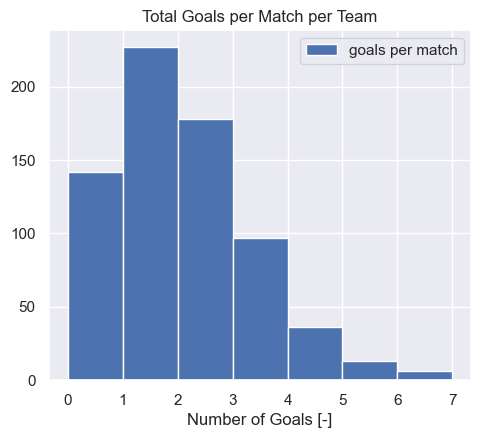

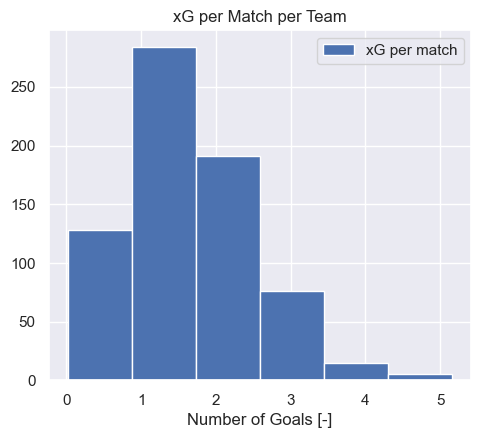

In [757]:
#Histogram of scored goals and xg from all teams in the Dataframe

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Total Goals per Match per Team')
plt.hist(df_cleaned['goals'],fill=True, bins = 7, alpha=1, label='goals per match')
plt.legend()
plt.xlabel('Number of Goals [-]')

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('xG per Match per Team')
plt.hist(df_cleaned['xg'],fill=True, bins = 6, alpha=1, label='xG per match')
plt.legend()
plt.xlabel('Number of Goals [-]')

C:\Users\I0331193\AppData\Local\Temp\ipykernel_12716\2974129975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_cleaned.corr().abs()


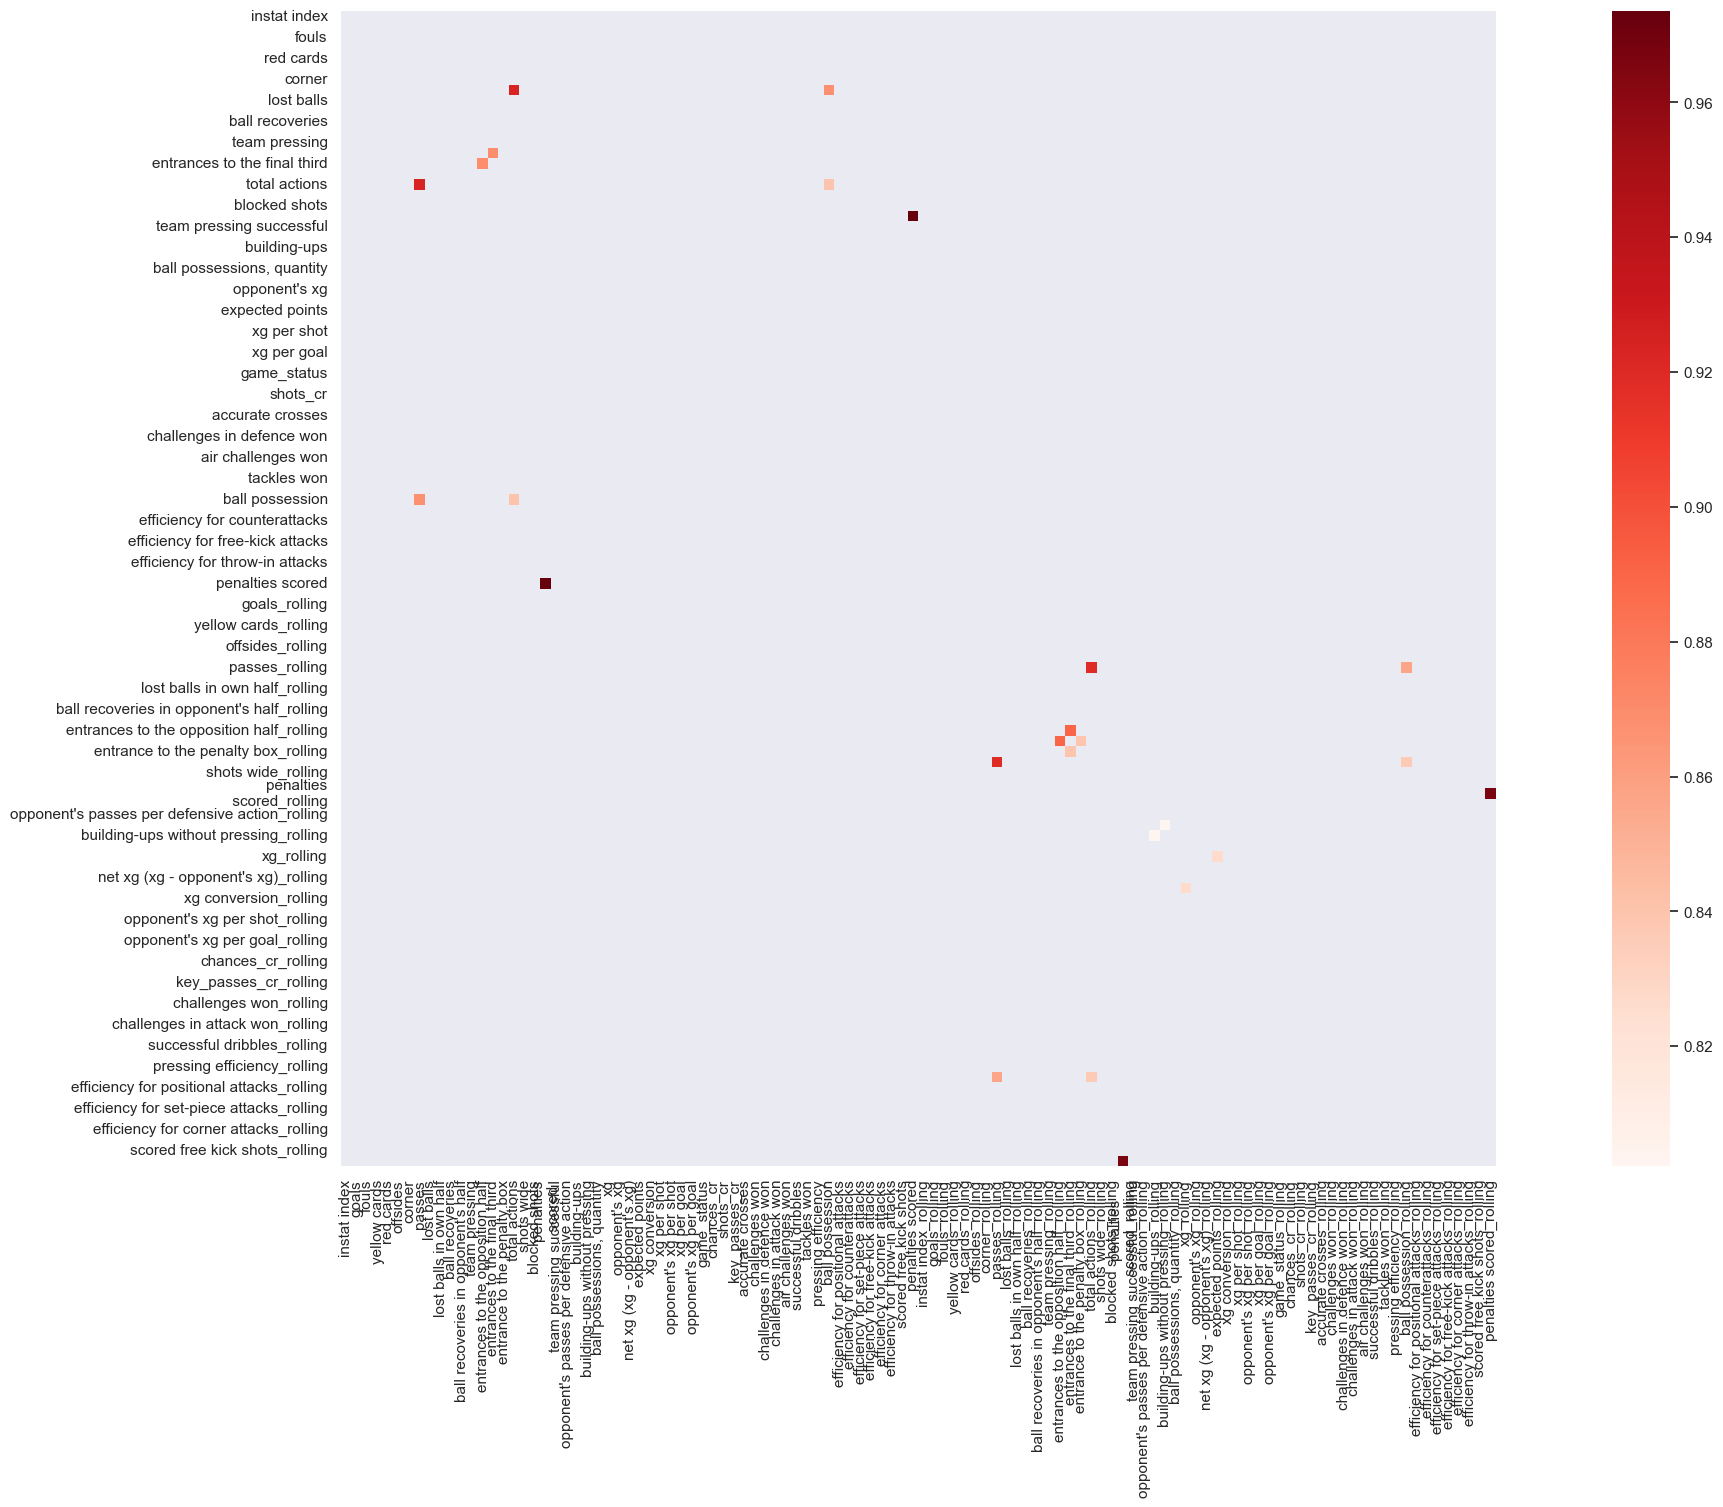

In [790]:
#crorrelation matrix and the heat map, filtered on certain threshold in order to make use of it. Otherwise, with the number of features, the heat map is not useful
corr=df_cleaned.corr().abs()

thres = 0.8 #filter the values based on a threshold = what correlation numbers should be shown

corr_adj = corr[(corr >= thres) & (corr!= 1.000)] 

#plot the heat map
plt.figure(figsize = (30,15))
ax = sns.heatmap(corr_adj, cmap="Reds" , square=True) #
plt.show()


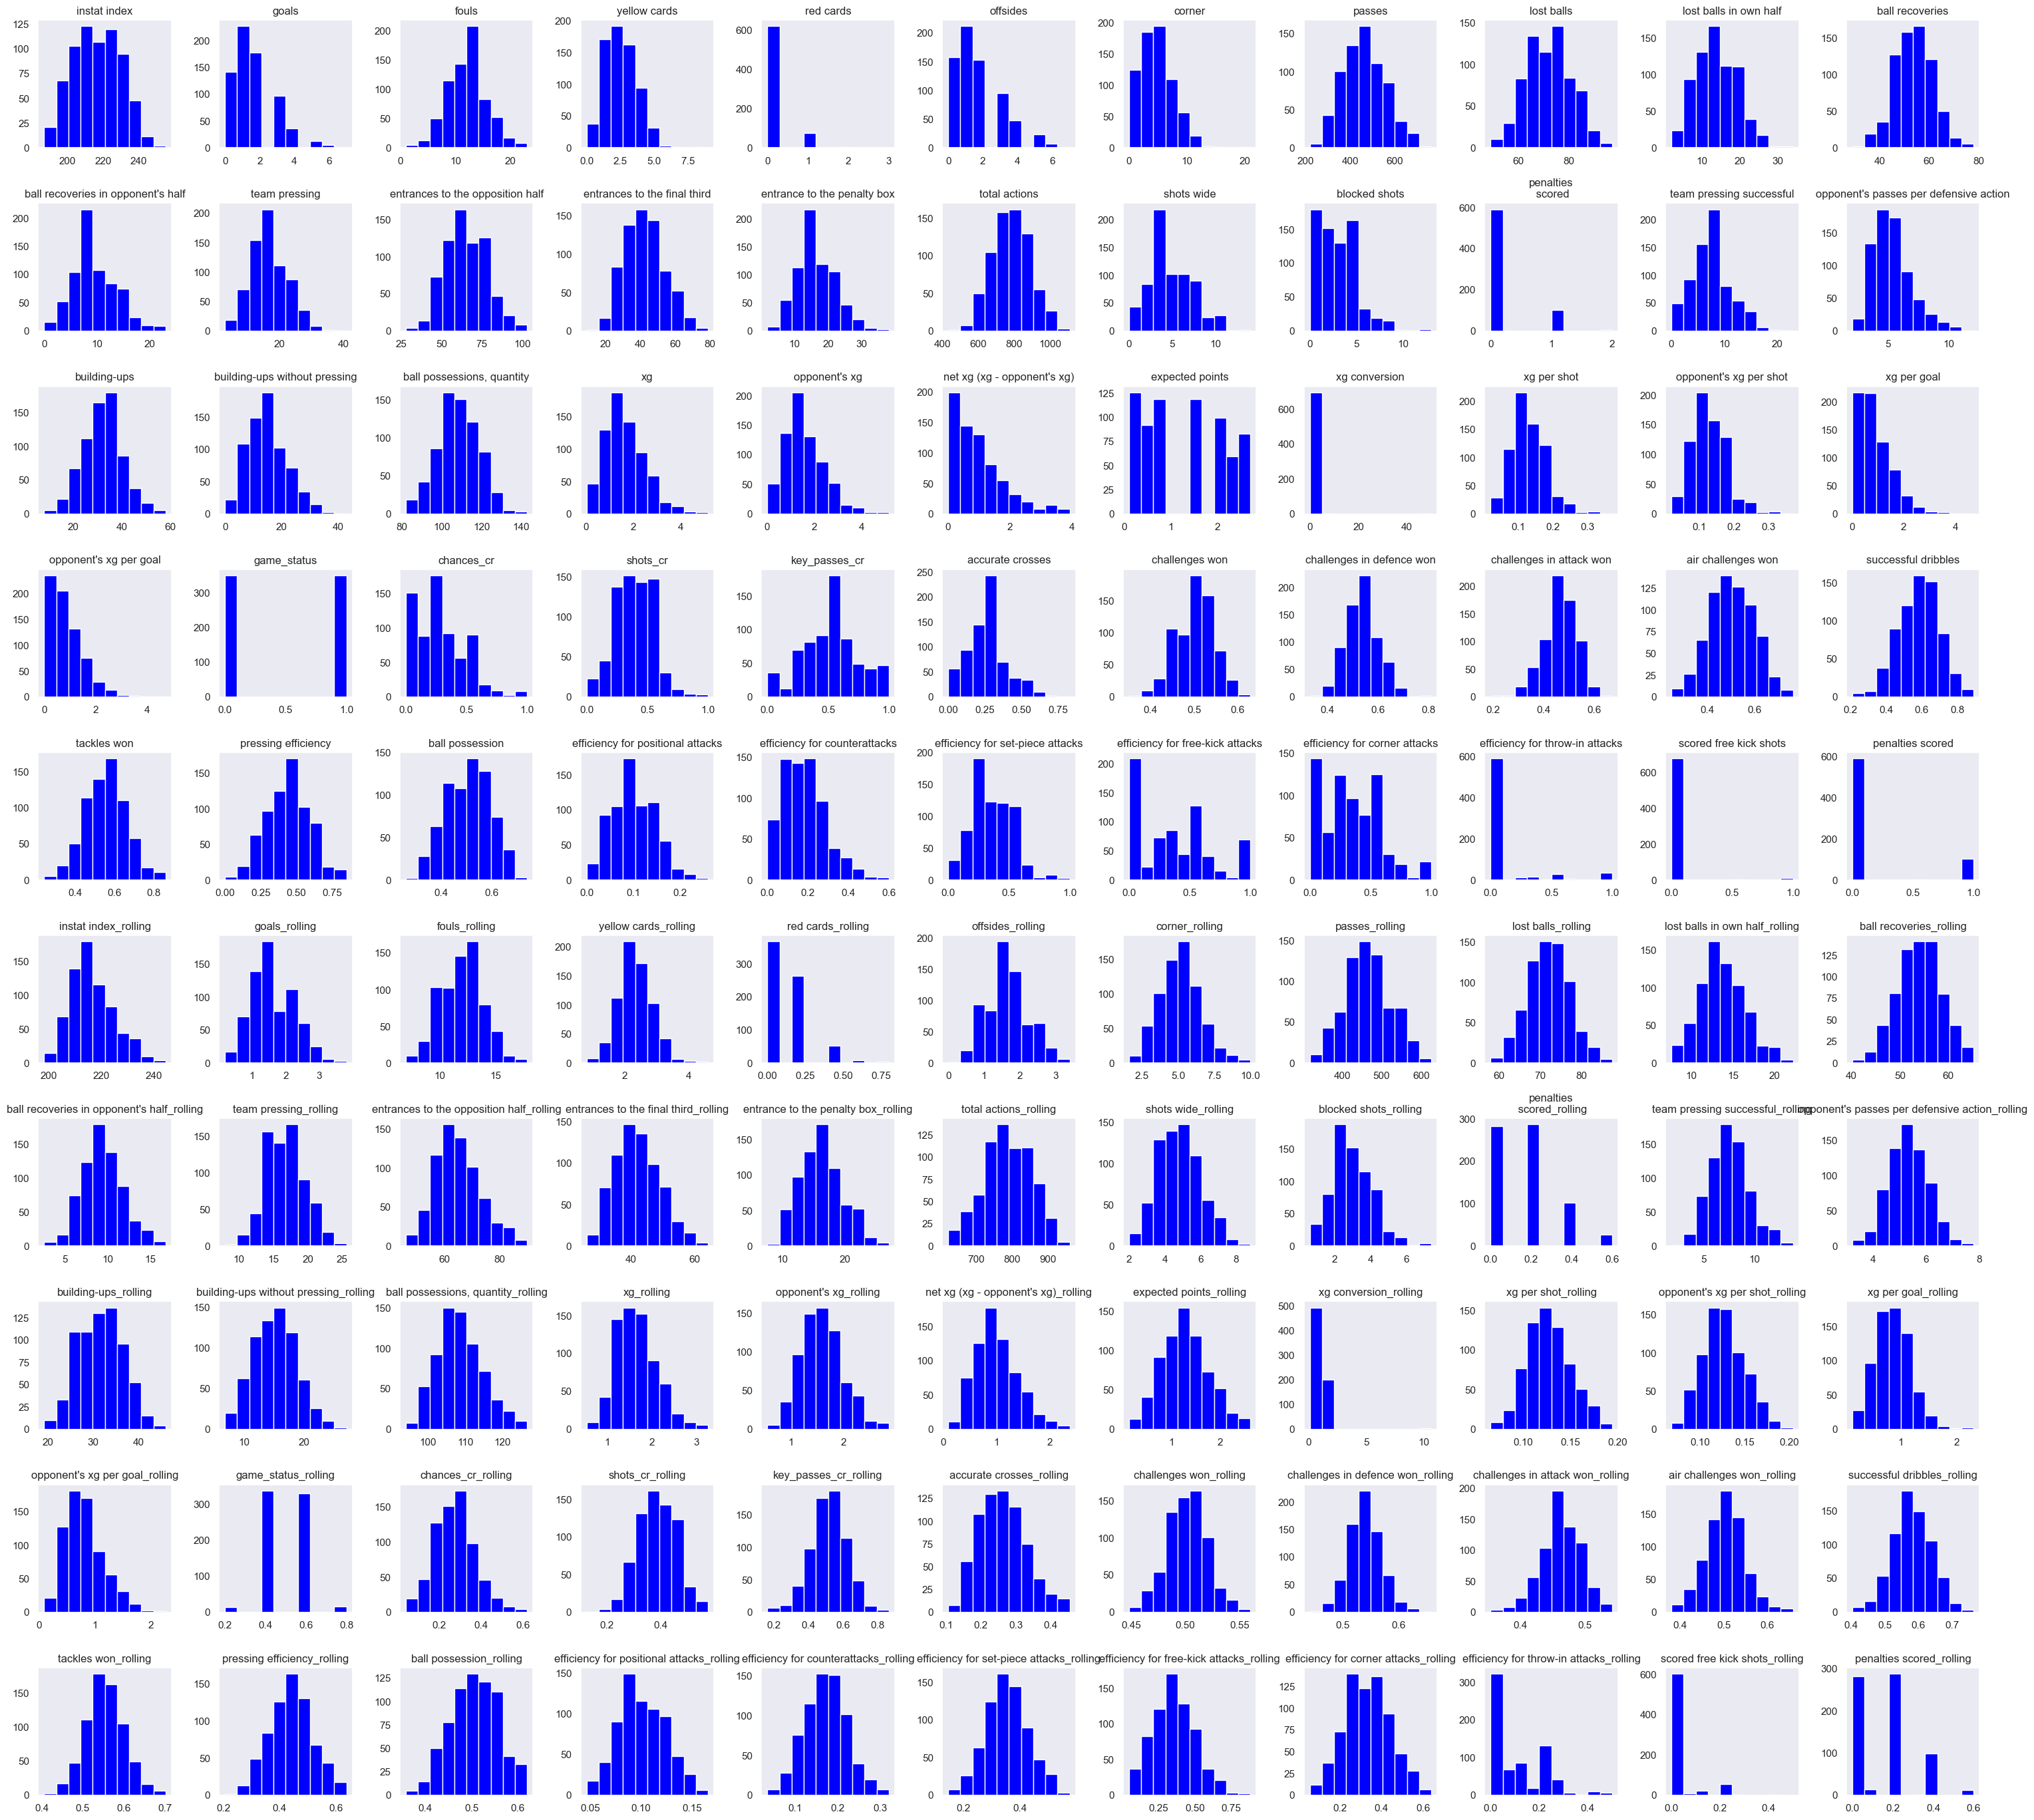

In [793]:
# histogram of all features
df_cleaned.drop(['match date'], axis=1).hist (layout = (11,11), color='blue', figsize=(30,30), grid=False)
#plt.suptitle('Histogram for all Numeric Variables')
plt.tight_layout()
plt.show()

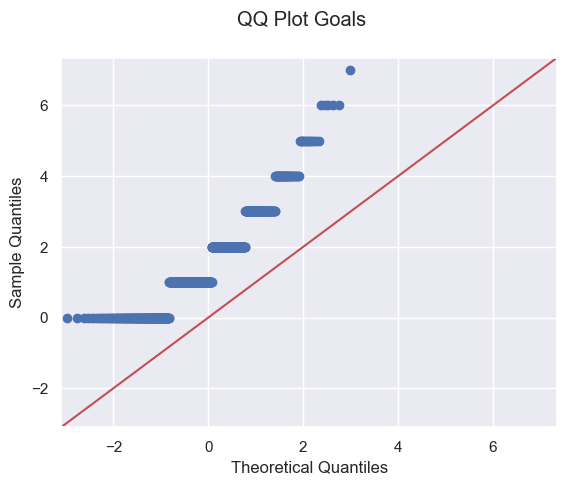

In [799]:
# qq plot to check the distribution of the goals
sm.qqplot(df_cleaned['goals'],line ='45')
plt.suptitle('QQ Plot Goals')
plt.show()


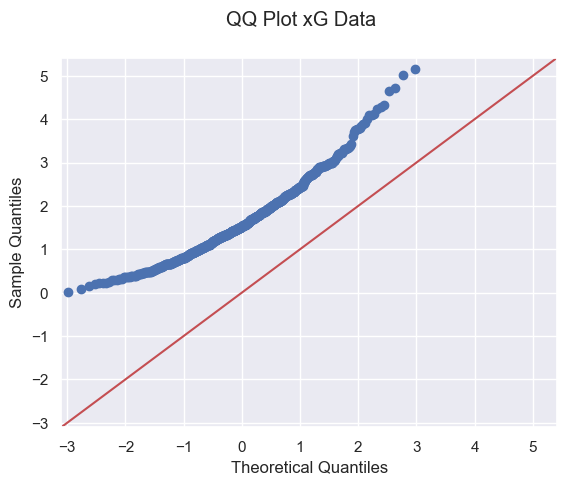

In [800]:
# qq plot to check the distribution of xG

sm.qqplot(df_cleaned['xg'],line ='45')
plt.suptitle('QQ Plot xG Data')
plt.show()

Text(0.5, 1.0, 'Boxplot of Goals and xG')

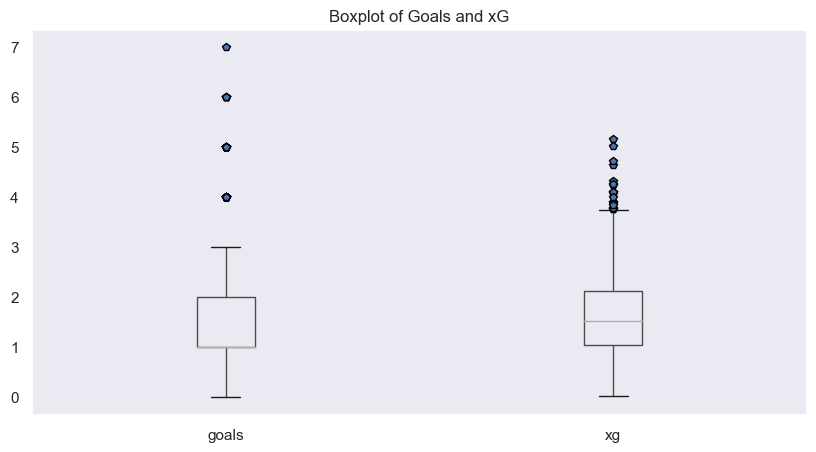

In [805]:
# boxplot graph for goal an xG
bit = dict(markerfacecolor='b', marker = 'p')
df_cleaned[['goals','xg']].boxplot(figsize=(10,5), grid = False, flierprops = bit)
plt.title('Boxplot of Goals and xG')

In [802]:
# D'Agostino's K-squared test

print(stats.normaltest(df_cleaned['goals']))
print(stats.normaltest(df_cleaned['xg']))

NormaltestResult(statistic=73.8727052268367, pvalue=9.093810047217652e-17)
NormaltestResult(statistic=77.1388585470318, pvalue=1.7762729261244642e-17)


## Save own file for every team

In [16]:
#get for every team an own file
grouped_by_team_cleaned = df_cleaned.groupby('team')

for check, gr in grouped_by_team_cleaned:
    gr.to_csv(r'C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\{}.csv'.format(check), index_label='index')

# Train / Test Preparation

In [311]:
# set search path and glob for files
# here we want to look for csv files in the input directory
path = r'C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data'
files = glob.glob(path + '/*.csv')

In [312]:
# create empty list to store dataframes
li = []

# loop through list of files and read each one into a dataframe and append to list
for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    li.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')

Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\BAS.csv with shape (83, 113)
Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\GRA.csv with shape (47, 113)
Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\LUG.csv with shape (77, 113)
Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\LUZ.csv with shape (83, 113)
Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\SG.csv with shape (83, 113)
Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\SIO.csv with shape (78, 113)
Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\YB.csv with shape (82, 113)
Successfully created dataframe for C:\Users\I0331193\Documents\CAS\DataFiles\Team_Data\ZUR.csv with shape (83, 113)


In [314]:
#get number of teams / files
li_len = len(li)
li_len

8

In [315]:
#get list of all team names
team = []

for f in range(0, li_len):
    team_x = li[f]['team'].unique()
    team.append(team_x)

In [317]:
#get the number of data entries per team
len_team_data = []

for x in range(0,li_len):
    data_len = len(li[x])
    len_team_data.append(data_len) 


In [552]:
#get train and test set per team by splitting based on a certain date or certain number of records
li_train = []
li_test = []

data_rec = 20

for l in range(0,li_len):
    train_features = li[l].head(len_team_data[l]-data_rec)
    #train_features = train_features[train_features['match date'] < '2022-08-24']
    test_features = li[l].tail(data_rec)
    #test_features = test_features[test_features['match date'] > '2022-08-24']
    li_train.append(train_features)
    li_test.append(test_features)

In [553]:
#Min Max Scale the data: training set

scaler = MinMaxScaler()

li_train_scale = []

for x in range(0,li_len):
    df_scale = li_train[x].drop(['goals','match date','team','index'], axis=1)
    df_scale = scaler.fit_transform(df_scale)
    df_scale = pd.DataFrame(df_scale, columns = li_train[x].drop(['goals','match date','team','index'], axis=1).columns)
    #df_scale = li_train[x].drop(['goals','match date','team','index'], axis=1) #no scale option
    li_train_scale.append(df_scale)

In [554]:
#Min Max Scale the data: test set

li_test_scale = []

for y in range(0,li_len):
    df_test_scale = scaler.transform(li_test[y].drop(['goals','match date','team','index'], axis=1))
    df_test_scale = pd.DataFrame(df_test_scale,columns = li_test[y].drop(['goals','match date','team','index'], axis=1).columns)
    #df_test_scale = li_test[y].drop(['goals','match date','team','index'], axis=1) #no scale option
    li_test_scale.append(df_test_scale)

In [555]:
#split in home and away data set which is later be used to predict the next game

li_test_scale_h =[]
li_test_scale_a = []
li_train_scale_h = []
li_train_scale_a = []

for x in range(0,li_len):
    test = li_test_scale[x]
    test_h = test[test['game_status']==0]
    test_a = test[test['game_status']==1]
    train = li_train_scale[x]
    train_h = train[train['game_status']==0]
    train_a = train[train['game_status']==1]
    li_test_scale_h.append(test_h)
    li_test_scale_a.append(test_a)
    li_train_scale_h.append(train_h)
    li_train_scale_a.append(train_a)

# Feature Selection



In [28]:
#solver of feature selector
ridge1 = RidgeCV(alphas=np.logspace(0, 6, num=5))

In [360]:
#define features to select (number = 'n_features_to_select')
li_feature_selected = []

for p in range(0,li_len):
    sfs_backward = SequentialFeatureSelector(
        ridge1, n_features_to_select=60, direction="backward"
        ).fit(li_train_scale[p], li_train[p]['goals'])
    li_feature_selected.append(sfs_backward)
    

In [520]:
#define train features without 'Goals','Match date','Team'
li_train_drop = []

for i in range(0, li_len):
    feat = li_train[i].drop(['goals','match date','team','index'], axis=1).keys()
    li_train_drop.append(feat)

In [521]:
#get the text of selected features
chosen_features = []

for t in range(0,li_len):
    feat_bbol = li_feature_selected[t].get_support()
    feat_txt = li_train_drop[t][feat_bbol]
    chosen_features.append(feat_txt)

In [522]:
#selected features for team 1
li_train_scale[1][chosen_features[1]].keys()

Index(['instat index', 'yellow cards', 'corner', 'ball recoveries',
       'ball recoveries in opponent's half', 'shots wide', 'blocked shots',
       'ball possessions, quantity', 'xg', 'opponent's xg', 'expected points',
       'xg conversion', 'xg per shot', 'xg per goal', 'opponent's xg per goal',
       'chances_cr', 'shots_cr', 'key_passes_cr', 'challenges in attack won',
       'air challenges won', 'pressing efficiency',
       'efficiency for positional attacks', 'efficiency for counterattacks',
       'efficiency for set-piece attacks', 'efficiency for free-kick attacks',
       'efficiency for corner attacks', 'efficiency for throw-in attacks',
       'scored free kick shots', 'instat index_rolling', 'fouls_rolling',
       'corner_rolling', 'passes_rolling', 'lost balls in own half_rolling',
       'ball recoveries_rolling', 'ball recoveries in opponent's half_rolling',
       'team pressing_rolling', 'entrances to the opposition half_rolling',
       'entrances to the fina

# Machine Leraning Methods

## Random Forest Regression

In [702]:
#fit the model: Random Forest Regressor
clf = []
for c in range(0,li_len):
    #chosen = chosen_features[c] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[c]'
    clf1 = RandomForestRegressor(n_estimators=75, criterion='squared_error', random_state=42, max_depth=10,min_samples_leaf=1).fit(li_train_scale[c][chosen_features[c]], li_train[c]['goals']) #, max_depth=20,li_train_scale[c][chosen_features[c]]
    clf.append(clf1)

In [705]:
#get training score of the model
train_score = []

for w in range(0, li_len):
    #chosen = chosen_features[w] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[w]'
    score_tr = clf[w].score(li_train_scale[w][chosen_features[w]], li_train[w]['goals']) #li_train_scale[w][chosen_features[w]]
    train_score.append(score_tr)

In [706]:
#get test score of the model
test_score = []

for x in range(0, li_len):
    #chosen = chosen_features[w] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[w]'
    score_te = clf[x].score(li_test_scale[x][chosen_features[x]], li_test[x]['goals']) #li_test_scale[x][chosen_features[x]]
    test_score.append(score_te)

In [707]:
#make dataframe out of the scores and the teams
df_test_score = pd.DataFrame(test_score, columns = ['Test_Score RF'])
df_train_score = pd.DataFrame(train_score, columns = ['Train_Score RF'])
df_teams = pd.DataFrame(team, columns = ['team'])

In [708]:
#show the score values in the training and test set, RF
overview = pd.concat([df_teams,df_train_score,df_test_score], axis = 1)
overview

,team,Train_Score RF,Test_Score RF
0,BAS,0.951144,0.811955
1,GRA,0.914467,0.472951
2,LUG,0.966829,0.411015
3,LUZ,0.959804,0.620011
4,SG,0.962085,0.582449
5,SIO,0.956244,0.718580
6,YB,0.962181,0.827871
7,ZUR,0.962040,0.798206


### Plotting

In [513]:
#get predicted goals of test set
test_pred = []

for y in range(0, li_len):
    pred_te = clf[y].predict(li_test_scale[y][chosen_features[y]])
    test_pred.append(pred_te)

In [518]:
#define which team you want to show (tx)
tx = 2

predicted_goals = test_pred[tx]
actual_goals = li_test[tx]['goals']
#predicted_goals, actual_goals

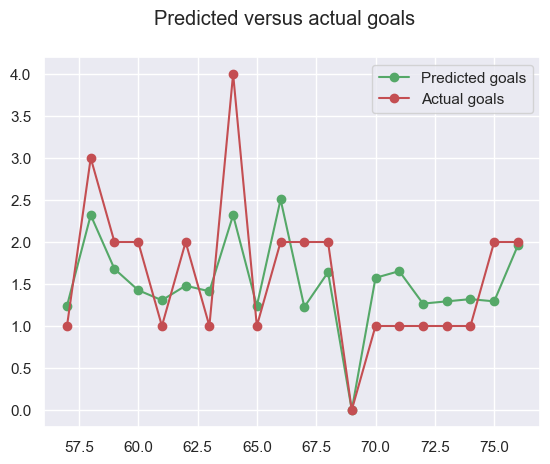

In [519]:
#Plot the predicted counts versus the actual counts for the test data.

fig = plt.figure()
fig.suptitle('Predicted versus actual goals')
predicted, = plt.plot(li_test[tx].index, predicted_goals, 'go-', label='Predicted goals')
actual, = plt.plot(li_test[tx].index, actual_goals, 'ro-', label='Actual goals')
plt.legend(handles=[predicted, actual])
plt.show()


## Lasso Approach

In [413]:
# fit the lasso model
clf_lasso = []

for c in range(0,li_len):
    #chosen = chosen_features[c] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[c]'
    clf_l = linear_model.Lasso(alpha=0.01,random_state=42, max_iter=100).fit(li_train_scale[c][chosen_features[c]], li_train[c]['goals'])
    clf_lasso.append(clf_l)

In [414]:
#get training score of the model
train_score_lasso = []

for w in range(0, li_len):
    #chosen = chosen_features[w] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[w]'
    score_tr_l = clf_lasso[w].score(li_train_scale[w][chosen_features[w]], li_train[w]['goals'])
    train_score_lasso.append(score_tr_l)

In [415]:
#get test score of the model
test_score_lasso = []

for x in range(0, li_len):
    #chosen = chosen_features[w] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[w]'
    score_te_l = clf_lasso[x].score(li_test_scale[x][chosen_features[x]], li_test[x]['goals'])
    test_score_lasso.append(score_te_l)

In [416]:
#make dataframe out of the scores and the teams
df_test_score_l = pd.DataFrame(test_score_lasso, columns = ['Test_Score_Lasso'])
df_train_score_l = pd.DataFrame(train_score_lasso, columns = ['Train_Score_Lasso'])
#df_teams = pd.DataFrame(team, columns = ['team'])

In [417]:
#show the score values in the training and test set, LASSO
overview_l = pd.concat([overview,df_train_score_l,df_test_score_l], axis = 1)
overview_l

,team,Train_Score RF,Test_Score RF,Train_Score_Lasso,Test_Score_Lasso
0,BAS,0.964155,0.899259,0.898214,0.644782
1,GRA,0.923867,0.559241,0.901070,0.416395
2,LUG,0.975733,0.536024,0.864002,0.622668
3,LUZ,0.965036,0.703830,0.805174,0.628321
4,SG,0.973508,0.687598,0.919579,0.713780
5,SIO,0.969689,0.917977,0.846410,0.765252
6,YB,0.969751,0.853208,0.891031,0.764239
7,ZUR,0.976293,0.858311,0.845734,0.713053


### Plotting

In [181]:
test_pred_lasso = []

for y in range(0, li_len):
    pred_te = clf_lasso[y].predict(li_test_scale[y][chosen_features[y]])
    test_pred_lasso.append(pred_te)

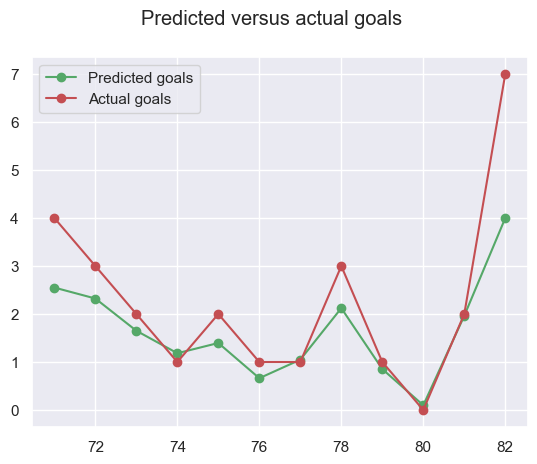

In [186]:
tx_l = 5

predicted_goals = test_pred_lasso[tx_l]
actual_goals = li_test[tx_l]['goals']

fig = plt.figure()
fig.suptitle('Predicted versus actual goals')
predicted, = plt.plot(li_test[tx_l].index, predicted_goals, 'go-', label='Predicted goals')
actual, = plt.plot(li_test[tx_l].index, actual_goals, 'ro-', label='Actual goals')
plt.legend(handles=[predicted, actual])
plt.show()


## KNeighbors Regressor

In [418]:
# fit the KNN model
clf_knn= []

for c in range(0,li_len):
    #chosen = chosen_features[c] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[c]'
    clf_k = KNeighborsRegressor(n_neighbors=3, leaf_size=3).fit(li_train_scale[c][chosen_features[c]], li_train[c]['goals'])
    clf_knn.append(clf_k)

In [419]:
#get training score of the model
train_score_knn = []

for w in range(0, li_len):
    #chosen = chosen_features[w] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[w]'
    score_tr_k = clf_knn[w].score(li_train_scale[w][chosen_features[w]], li_train[w]['goals'])
    train_score_knn.append(score_tr_k)

In [420]:
#get test score of the model
test_score_knn = []

for x in range(0, li_len):
    #chosen = chosen_features[w] --> in case the chosen features have to be defined first --> exchange with 'chosen_features[w]'
    score_te_k = clf_knn[x].score(li_test_scale[x][chosen_features[x]], li_test[x]['goals'])
    test_score_knn.append(score_te_k)

In [421]:
#make dataframe out of the scores and the teams
df_test_score_k = pd.DataFrame(test_score_knn, columns = ['Test_Score_KNN'])
df_train_score_k = pd.DataFrame(train_score_knn, columns = ['Train_Score_KNN'])
#df_teams = pd.DataFrame(team, columns = ['team'])

In [422]:
#show the score values in the training and test set, KNN
overview_k = pd.concat([overview_l,df_train_score_k,df_test_score_k], axis = 1)
overview_k

,team,Train_Score RF,Test_Score RF,Train_Score_Lasso,Test_Score_Lasso,Train_Score_KNN,Test_Score_KNN
0,BAS,0.964155,0.899259,0.898214,0.644782,0.743068,0.647634
1,GRA,0.923867,0.559241,0.901070,0.416395,0.794444,0.452160
2,LUG,0.975733,0.536024,0.864002,0.622668,0.877588,0.061562
3,LUZ,0.965036,0.703830,0.805174,0.628321,0.583416,0.261518
4,SG,0.973508,0.687598,0.919579,0.713780,0.837794,-0.080468
5,SIO,0.969689,0.917977,0.846410,0.765252,0.718511,0.457216
6,YB,0.969751,0.853208,0.891031,0.764239,0.673661,0.743797
7,ZUR,0.976293,0.858311,0.845734,0.713053,0.825906,0.116162


# Deep Learning

## FNN

In [648]:
# creating the model
i = tf.keras.layers.Input(
    shape=(li_train_scale[5].shape[1]), name='InputLayer')  # input layer
hl1 = tf.keras.layers.Dense(
    109, activation='linear', kernel_regularizer='l2', name='FCLayer1')(i)  # hidden layer 1
hl2 = tf.keras.layers.Dense(
    30, activation='relu', kernel_regularizer='l2', name='FCLayer2')(hl1)  # hidden layer 2
#hl3 = tf.keras.layers.Dense(
    #15, activation='relu', kernel_regularizer='l2', name='FCLayer3')(hl2)  # hidden layer 3
o = tf.keras.layers.Dense(1, activation='linear',
                          name='OutputLayer')(hl2)  # output layer

ffnn = tf.keras.models.Model(
    i, o, name='Feed_Forward_Neural_Network')  # put the layer together

ffnn.summary()  # show model summary

Model: "Feed_Forward_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 109)]             0         
                                                                 
 FCLayer1 (Dense)            (None, 109)               11990     
                                                                 
 FCLayer2 (Dense)            (None, 30)                3300      
                                                                 
 OutputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 15,321
Trainable params: 15,321
Non-trainable params: 0
_________________________________________________________________


In [649]:
# optimze parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # define optimizer
loss = tf.keras.losses.MeanSquaredError() # define loss function

# define metrics
metric = ['accuracy']

# compile the model
ffnn.compile(
    optimizer=optimizer,
    loss=loss)
    #metrics=metric)

In [650]:
# fit model with training set and apply to test set
ffnn.fit(
    li_train_scale[1],
    li_train[1]['goals'],
    validation_data=(li_test_scale[1], li_test[1]['goals']),
    epochs=250,
    batch_size=10)

Epoch 1/250
3/3 [==============================] - 2s 235ms/step - loss: 9.6158 - val_loss: 4.2456
Epoch 2/250
3/3 [==============================] - 0s 47ms/step - loss: 3.7089 - val_loss: 3.1772
Epoch 3/250
3/3 [==============================] - 0s 48ms/step - loss: 3.0472 - val_loss: 3.5096
Epoch 4/250
3/3 [==============================] - 0s 77ms/step - loss: 3.2540 - val_loss: 3.4992
Epoch 5/250
3/3 [==============================] - 0s 52ms/step - loss: 3.1218 - val_loss: 3.2570
Epoch 6/250
3/3 [==============================] - 0s 46ms/step - loss: 2.8578 - val_loss: 3.0781
Epoch 7/250
3/3 [==============================] - 0s 52ms/step - loss: 2.7424 - val_loss: 3.0503
Epoch 8/250
3/3 [==============================] - 0s 47ms/step - loss: 2.6953 - val_loss: 3.0433
Epoch 9/250
3/3 [==============================] - 0s 41ms/step - loss: 2.6672 - val_loss: 2.9995
Epoch 10/250
3/3 [==============================] - 0s 39ms/step - loss: 2.5888 - val_loss: 2.9091
Epoch 11/250
3/3 [

### Plotting

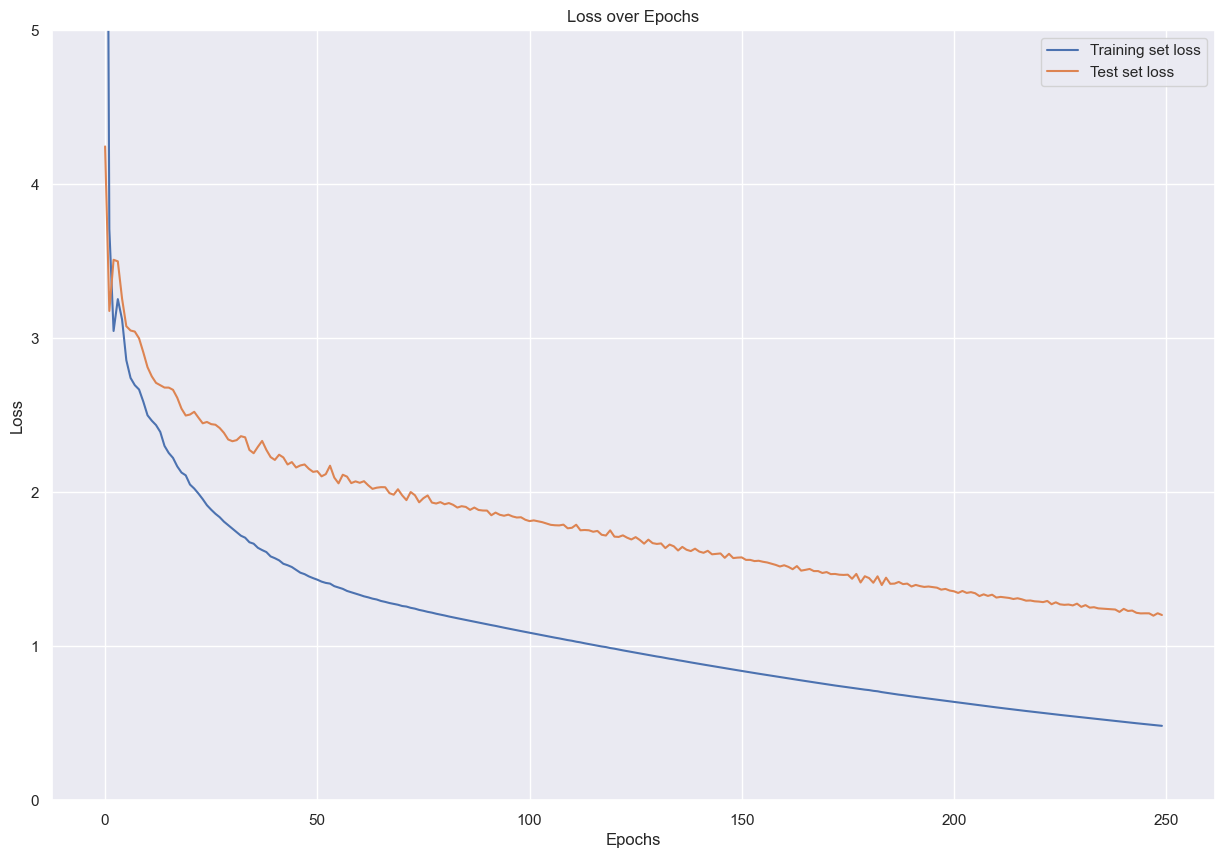

In [651]:
# set size
fig, ax = plt.subplots(figsize=(15, 10))  # set size

# config of chart
plt.plot(ffnn.history.history['loss'],
         label="Training set loss")  # plot training loss
plt.plot(ffnn.history.history['val_loss'],
         label="Test set loss")  # plot test loss
plt.ylim([0, 5])  # set range of y-axis
plt.title("Loss over Epochs")  # set main titel
plt.xlabel("Epochs")  # set titel for x-axis
plt.ylabel("Loss")  # set titel for y-axis
plt.legend()  # show legend
plt.show()  # show only plot

1/1 [==============================] - 0s 167ms/step


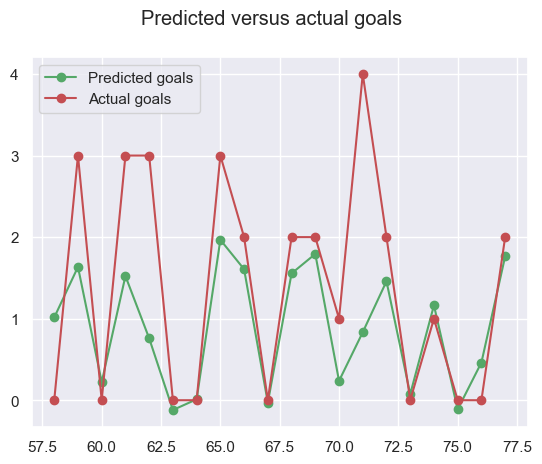

In [647]:
y_pred = ffnn.predict(li_test_scale[5])

fig = plt.figure()
fig.suptitle('Predicted versus actual goals')
predicted, = plt.plot(li_test[5].index, y_pred, 'go-', label='Predicted goals')
actuals, = plt.plot(li_test[5].index, li_test[5]['goals'], 'ro-', label='Actual goals')
plt.legend(handles=[predicted, actuals])
plt.show()

## RNN

In [588]:
# Need the training data to be in the form [sample, time steps, features (dimension of each element)]
samples = 3 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(li_train_scale[5].shape[0] - samples):
    X.append(li_train_scale[5].iloc[i:i+samples].values) # Independent Samples
    Y.append(li_train[5]['goals'].iloc[i+samples]) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

Training Data: Length is  3 :  [array([[0.72093023, 0.76470588, 0.22222222, 0.        , 1.        ,
        0.3       , 0.19879518, 0.58064516, 0.25      , 0.9       ,
        0.23529412, 0.44827586, 0.29545455, 0.25      , 0.52941176,
        0.28055556, 0.        , 0.28571429, 0.        , 0.23076923,
        0.43768116, 0.07692308, 0.2       , 0.4       , 0.10060976,
        0.46169772, 0.50867052, 0.        , 1.        , 0.16      ,
        0.38095238, 0.11148649, 0.        , 1.        , 0.25      ,
        0.75      , 0.5       , 0.30357143, 0.68421053, 0.40625   ,
        0.81081081, 0.78947368, 0.81818182, 0.34883721, 0.2173913 ,
        0.06451613, 0.3       , 0.17391304, 0.33      , 0.67      ,
        0.        , 0.        , 0.        , 0.        , 0.63829787,
        0.        , 0.41025641, 0.27777778, 0.5       , 0.63636364,
        0.68421053, 0.65022422, 0.57317073, 0.33333333, 0.70408163,
        0.61538462, 0.12      , 0.73831776, 0.88732394, 0.38709677,
        0.655650

In [589]:
#Reshape the data so that the inputs will be acceptable to the model
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

Dimensions of X (55, 3, 109) Dimensions of Y (55,)


In [590]:
# Need the test data to be in the form [sample, time steps, features (dimension of each element)]
samples = 3 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X_test = [] # X array
Y_test = [] # Y array
for i in range(li_test_scale[5].shape[0] - samples):
    X_test.append(li_test_scale[5].iloc[i:i+samples].values) # Independent Samples
    Y_test.append(li_test[5]['goals'].iloc[i+samples]) # Dependent Samples
print('Training Data: Length is ',len(X_test[0:1][0]),': ', X_test[0:1])
print('Testing Data: Length is ', len(Y_test[0:1]),': ', Y_test[0:1])

Training Data: Length is  3 :  [array([[ 0.05555556,  0.3125    ,  0.6       ,  0.        ,  0.28571429,
         0.3       ,  0.58737864,  0.9047619 ,  0.89473684,  0.72972973,
         0.38461538,  0.18181818,  0.44897959,  0.34146341,  0.35714286,
         0.7167756 ,  0.5       ,  0.375     ,  0.        ,  0.23076923,
         0.19278997,  0.62162162,  0.21428571,  0.64583333,  0.48504983,
         0.66329114,  0.35568513,  0.07692308,  0.        ,  0.5       ,
         0.76470588,  0.        ,  0.26415094,  1.        ,  0.        ,
         0.3       ,  0.22727273,  0.77192982,  0.54545455,  0.15789474,
         0.78947368,  0.05263158,  0.72131148,  0.13513514,  0.36363636,
         0.51351351,  0.33333333,  0.43636364,  0.14      ,  0.        ,
         0.33      ,  0.        ,  0.        ,  0.        , -0.06206897,
         0.15384615,  0.82758621,  0.84615385,  1.        ,  0.58333333,
         0.125     ,  0.69263607,  0.80519481,  0.97368421,  0.36486486,
         0.33333333

In [591]:
#Reshape the data so that the inputs will be acceptable to the model.b
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print('Dimensions of X', X_test.shape, 'Dimensions of Y', Y_test.shape)

Dimensions of X (17, 3, 109) Dimensions of Y (17,)


In [697]:
# creating the model
srnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(
        shape=(X.shape[1],X.shape[2]), name='InputLayer'),  # input layer
    tf.keras.layers.SimpleRNN(109, activation='linear', use_bias=True,return_sequences=True,
                              name='RNNLayer1'),  # RNN hidden layer 1
    tf.keras.layers.SimpleRNN(80, activation='relu', return_sequences=True,
                              kernel_regularizer='l2', name='RNNLayer2'),  # RNN hidden layer 2
    tf.keras.layers.Dropout(0.5, name='DropoutLayer'),  # dropout layer
    tf.keras.layers.Flatten(name='FlattenLayer'),  # flatten layer
    # fully-connected layer
    tf.keras.layers.Dense(30, activation='relu', name='FCLayer'),
    tf.keras.layers.Dense(1, activation='linear',
                          name='OutputLayer')  # output layer
], name="Simple_Recurrent_Neural_Network")

srnn.summary()  # show model summary

Model: "Simple_Recurrent_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RNNLayer1 (SimpleRNN)       (None, 3, 109)            23871     
                                                                 
 RNNLayer2 (SimpleRNN)       (None, 3, 80)             15200     
                                                                 
 DropoutLayer (Dropout)      (None, 3, 80)             0         
                                                                 
 FlattenLayer (Flatten)      (None, 240)               0         
                                                                 
 FCLayer (Dense)             (None, 30)                7230      
                                                                 
 OutputLayer (Dense)         (None, 1)                 31        
                                                                 
Total params: 46,332
Trainable para

In [698]:
# optimze parameters
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)  # define optimizer
loss = tf.keras.losses.MeanSquaredError()  # define loss function

# define metrics
metric = ['accuracy']

# compile the model
srnn.compile(
    optimizer=optimizer,
    loss=loss
    #metrics=metric
    )

In [699]:
# fit model with training set and apply to test set =
srnn.fit(
    X,
    Y,
    shuffle = False,
    validation_data=(X_test, Y_test),
    epochs=150,
    batch_size=5,
    verbose=1)

Epoch 1/150
11/11 [==============================] - 8s 89ms/step - loss: 4.0313 - val_loss: 2.5462
Epoch 2/150
11/11 [==============================] - 0s 19ms/step - loss: 2.8090 - val_loss: 2.9182
Epoch 3/150
11/11 [==============================] - 0s 16ms/step - loss: 2.4919 - val_loss: 3.2914
Epoch 4/150
11/11 [==============================] - 0s 17ms/step - loss: 2.5333 - val_loss: 2.7310
Epoch 5/150
11/11 [==============================] - 0s 16ms/step - loss: 2.9849 - val_loss: 2.6801
Epoch 6/150
11/11 [==============================] - 0s 14ms/step - loss: 2.0841 - val_loss: 2.4672
Epoch 7/150
11/11 [==============================] - 0s 17ms/step - loss: 1.9248 - val_loss: 2.5884
Epoch 8/150
11/11 [==============================] - 0s 14ms/step - loss: 1.9993 - val_loss: 2.5394
Epoch 9/150
11/11 [==============================] - 0s 14ms/step - loss: 2.0189 - val_loss: 2.4115
Epoch 10/150
11/11 [==============================] - 0s 17ms/step - loss: 1.9952 - val_loss: 2.4862

### Plotting

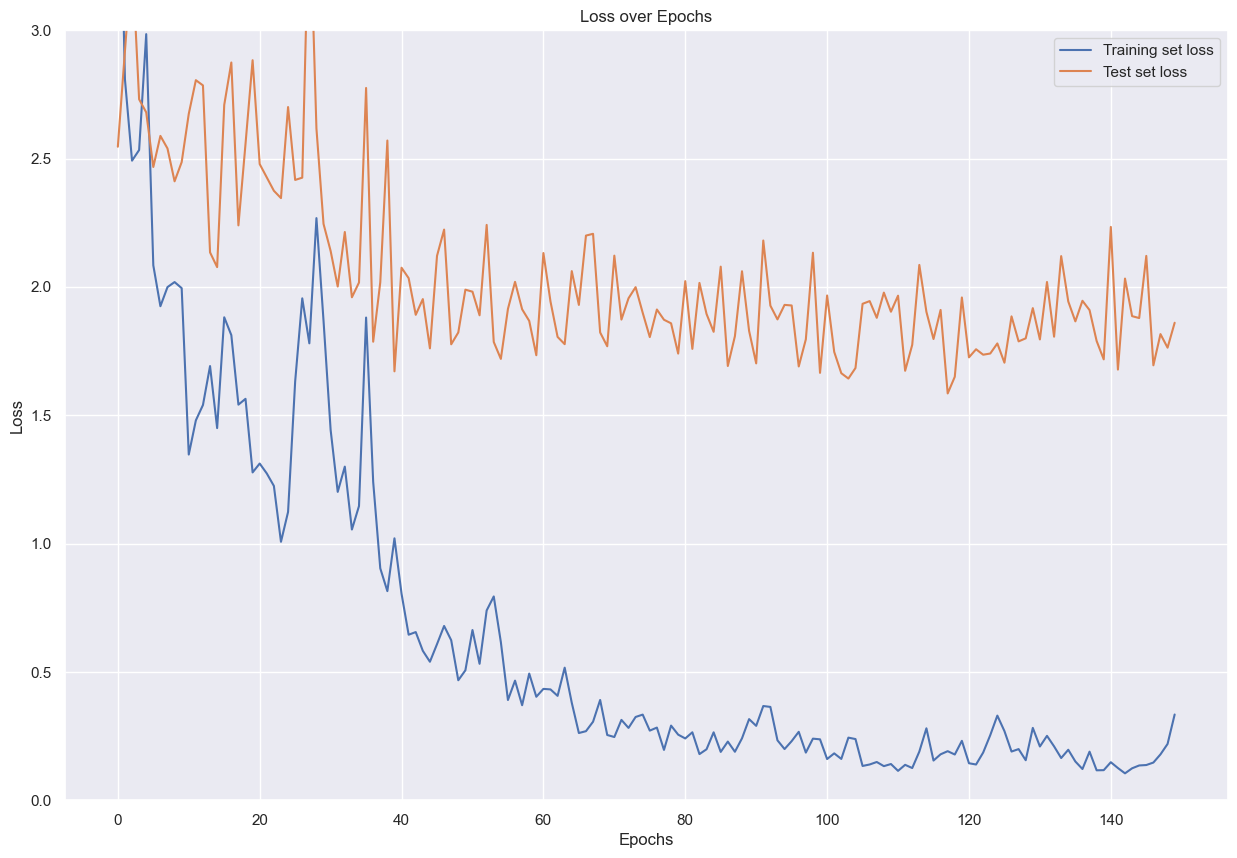

In [700]:
# set size
fig, ax = plt.subplots(figsize=(15, 10))  # set size

# config of chart
plt.plot(srnn.history.history['loss'],
         label="Training set loss")  # plot training loss
plt.plot(srnn.history.history['val_loss'],
         label="Test set loss")  # plot test loss
plt.ylim([0, 3])  # set range of y-axis
plt.title("Loss over Epochs")  # set main titel
plt.xlabel("Epochs")  # set titel for x-axis
plt.ylabel("Loss")  # set titel for y-axis
plt.legend()  # show legend
plt.show()  # show only plot

1/1 [==============================] - 0s 340ms/step


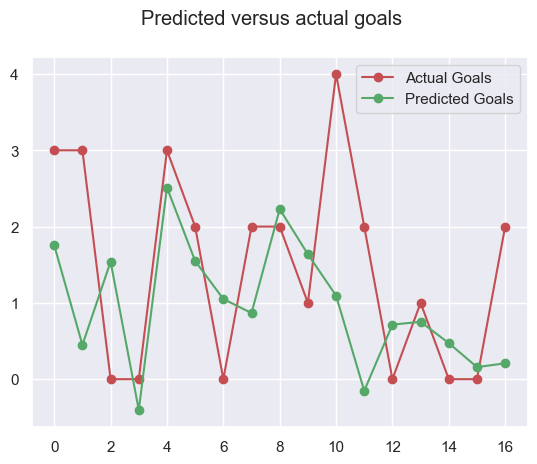

In [811]:
y_pred = srnn.predict(X_test)

plt.suptitle('Predicted versus actual goals')
plt.plot(Y_test,'ro-', label = 'Actual Goals')
plt.plot(y_pred, 'go-', label = 'Predicted Goals')
plt.legend()

# Calculate Game Outcome

## Load Next Games

In [380]:
#load the next games and get the number of games loaded
df_games=pd.read_csv(r'C:..\games.csv') #get data from gitub repository / filename 'games.csv'

#number of games
num_games = len(df_games)

In [382]:
#get the index of the team of the games
index_teams_home = []
index_teams_away = []

for z in range(0,num_games):
    txt_idx_h = df_games.at[z,'Team_h']
    idx_h = team.index(txt_idx_h)
    txt_idx_a = df_games.at[z,'Team_a']
    idx_a = team.index(txt_idx_a)
    index_teams_home.append(idx_h)
    index_teams_away.append(idx_a)

In [383]:
#convert the lists into df and show the game in the index vaue of the teams
home_teams = pd.DataFrame(index_teams_home, columns=['H_team'])
away_teams = pd.DataFrame(index_teams_away,columns=['A_team'])
game_index = pd.concat([home_teams,away_teams], axis = 1)
game_index

,H_team,A_team
0,3,7
1,1,6
2,5,2
3,4,0


## Predict Next Game

1. Check what features have been selected by the feature selector. Goal is to take the mean of the last x games of the selected fatures in order to a new line to predict the goals of the next game
2. if opponents data is in the features, identified by 'Opponent's*', the next opponent's features have to be examined (if yes, opponents mean of the according value has to be calculated), mean of those features have to be calculated and tranlated / concat back to the team you are checking for

In [384]:
# Get the selected features and check if opponent's features are involved
feats = []

for z in range(0,li_len):
    g = li_test_scale[z][chosen_features[z]]
    opp_col = [col for col in g.columns if col.startswith("opponent's xg" or "opponent's xg per shot" or "opponent's xg per goal" or "opponent's xg_rolling" or "opponent's xg per goal_rolling" or "opponent's xg per shot_rolling")]
    feats.append(opp_col)


In [386]:
#check which index / team has an opponents value in its features by defininf "yes" or "no"
opponents = []

for t in range(0,li_len):
    if feats[t]==[]:
        df_index = 'yes'
    else:
        df_index = 'no'
    opponents.append(df_index)


In [388]:
#Replace / get the column from the opponent you want to add to the team including opponent's information
# to do: translate into list [] for each team in case it has opponents information in feature name
#find the opponent with the formula
feat_opp=[]

for i in range(0,li_len):
    if opponents[i] == 'no':
        opp_col_1 = feats[i]
        opp_col_1 = [w.replace("opponent's ", '') for w in opp_col_1]
    else:
        opp_col_1=[]
    feat_opp.append(opp_col_1)

In [390]:
#get the opponent team index by checking what the opponents index is based on the team's to be checked index
opp_idx=[]

for x in range(0,li_len):
    if opponents[x] == 'no':
        if game_index.loc[game_index['A_team'] == x,'H_team'].empty == True:
            df_idx = game_index.loc[game_index['H_team'] == x,'A_team']
        else:
            df_idx = game_index.loc[game_index['A_team'] == x,'H_team']
    else:
        df_idx = []
    opp_idx.append(df_idx)

### Define Next Goal Parameter

In [487]:
#get the features of opponents team's mean of the tail(x) test data depending on home or away team
opp_features =[]

tail = 2 #define how many game of the past you want to consider for predicting the goals of the next game

for x in range(0,li_len):
   if opponents[x] == 'no':
      if game_index[game_index['A_team'] == x].empty == True:
         li_opp = li_test_scale_a[int(opp_idx[x])][feat_opp[x]].tail(tail).mean() #.tail(3)
      else:
         li_opp = li_test_scale_h[int(opp_idx[x])][feat_opp[x]].tail(tail).mean() #.tail(3)        
   else:
      li_opp = []
   opp_features.append(li_opp)  

In [488]:
#translate and transform the opponents features back to a dataframe
trans_feat=[]

for x in range(0,li_len):
    if opponents[x] == 'no':
        g1 = pd.DataFrame(opp_features[x]).T
        g1 = g1.add_prefix("opponent's ")
    else:
        g1 = []
    trans_feat.append(g1)   


In [489]:
# get the mean of the test set features and if opponents value are included, drop them
feats_mean = []

for x in range(0,li_len):
    if opponents[x] == 'no':
        if game_index[game_index['A_team'] == x].empty == True:
            g2 = li_test_scale_h[x][chosen_features[x]]
            g2 = g2.drop(trans_feat[x].keys(), axis=1)
            g2 = g2.tail(tail).mean() #.tail(3)
        else:
            g2 = li_test_scale_a[x][chosen_features[x]]
            g2 = g2.drop(trans_feat[x].keys(), axis=1)
            g2 = g2.tail(tail).mean() #.tail(3)
    else:
        if game_index[game_index['A_team'] == x].empty == True:
            g2 = li_test_scale_h[x][chosen_features[x]].tail(tail).mean() #.tail(3)
        else:
            g2 = li_test_scale_a[x][chosen_features[x]].tail(tail).mean() #.tail(3)
    feats_mean.append(g2)   

In [490]:
#add the mean row to the existing test dataframe and reset the index so the added row is at the last position
tot_mean = []

for x in range(0,li_len):
    if opponents[x] == 'no':
        h = pd.DataFrame(feats_mean[x]).T #new row of features in case you have an opposite's feature
        k = pd.concat([h,trans_feat[x]], axis=1) #concat new row with the opposite's information / feature
        l = li_test_scale[x][chosen_features[x]] #test set (is this necessary???)
        m = pd.concat([l,k]).reset_index(drop=True) #concat test set and new row
    else:
        h = pd.DataFrame(feats_mean[x]).T #new row of features
        l = li_test_scale[x][chosen_features[x]] #test set (ist this necessary???)
        m = pd.concat([l,h]).reset_index(drop=True) #concat test set and new row
    tot_mean.append(m)



In [491]:
#predict the number goals of the next game of team x (1) RandomForest
pred_next_goal = []

for y in range(0, li_len):
    p = clf[y].predict(tot_mean[y])
    q = len(tot_mean[y])
    r = p[(q-1)]
    pred_next_goal.append(r)

In [492]:
#predict the number goals of the next game of team x (1) Lasso
pred_next_goal_l = []

for y in range(0, li_len):
    p = clf_lasso[y].predict(tot_mean[y])
    q = len(tot_mean[y])
    r = p[(q-1)]
    pred_next_goal_l.append(r)

In [493]:
# get the predicted goals of the game by RandomForest model
outcome_pred_h = []
outcome_pred_a = []

for x in range(0,len(game_index)):
    h_s = pred_next_goal[game_index['H_team'][x]]
    a_s = pred_next_goal[game_index['A_team'][x]]
    outcome_pred_h.append(h_s)
    outcome_pred_a.append(a_s)

In [494]:
# get the predicted goals of the game by Lasso model
outcome_pred_h_l = []
outcome_pred_a_l = []

for x in range(0,len(game_index)):
    h_s_l = pred_next_goal_l[game_index['H_team'][x]]
    a_s_l = pred_next_goal_l[game_index['A_team'][x]]
    outcome_pred_h_l.append(h_s_l)
    outcome_pred_a_l.append(a_s_l)

In [495]:
#convert lists of predicted goals to df, RandomForest
h = pd.DataFrame(outcome_pred_h, columns=['H_score_RF'] )
a = pd.DataFrame(outcome_pred_a, columns=['A_score_RF'] )
pred_coutcome = pd.concat([df_games,h,a], axis=1)
pred_coutcome

,Team_h,Team_a,H_score_RF,A_score_RF
0,LUZ,ZUR,1.560000,2.133333
1,GRA,YB,2.200000,2.760000
2,SIO,LUG,1.173333,1.280000
3,SG,BAS,1.666667,1.440000


In [475]:
#convert lists of predicted goals to df, Lasso and concat with RandomForest
h_l = pd.DataFrame(outcome_pred_h_l, columns=['H_score_Lasso'] )
a_l = pd.DataFrame(outcome_pred_a_l, columns=['A_score_Lasso'] )
pred_coutcome_l = pd.concat([pred_coutcome,h_l,a_l], axis=1)
pred_coutcome_l

,Team_h,Team_a,H_score_RF,A_score_RF,H_score_Lasso,A_score_Lasso
0,LUZ,ZUR,1.533333,1.786667,1.590397,1.302052
1,GRA,YB,2.000000,3.466667,0.738293,2.290849
2,SIO,LUG,1.080000,1.253333,0.888695,1.302775
3,SG,BAS,1.560000,1.360000,1.893962,1.548850


# Probability for Game outcomes

## Poission Distribution

In [496]:
#apply the Poisson distribution based on the predicted goals form the previous section

counts = np.arange(20)

goal_prob_rf = []
goal_prob_l = []

for m in range(0, li_len):
    prob = np.asarray([poisson.pmf(counts, pred_next_goal[m], 0)])
    prob_l = np.asarray([poisson.pmf(counts, pred_next_goal_l[m], 0)])
    goal_prob_rf.append(prob)
    goal_prob_l.append(prob_l)


In [497]:
#concat team and poisson ditribution
# probability per goal, based on the train set, transposed and add the Team
goal_probability = []
goal_probability_l = []

for t in range(0,li_len):
    proba = pd.DataFrame(goal_prob_rf[t])
    concat = pd.concat([pd.DataFrame(team[t], columns=['Team']),proba], axis = 1)
    proba_l = pd.DataFrame(goal_prob_l[t])
    concat_l = pd.concat([pd.DataFrame(team[t], columns=['Team']),proba_l], axis = 1)
    goal_probability.append(concat)
    goal_probability_l.append(concat_l)

## Calculate Probabilities for Games

In [498]:
#create list with probabilities of number of goals
proba_both_score = []
proba_min0 = []
proba_min1 = []
proba_min2 = []
proba_min3 = []

for x in range(0,len(game_index)):
    b_s = (1-goal_probability[game_index['H_team'][x]][0])*(1-goal_probability[game_index['A_team'][x]][0])-goal_probability[game_index['A_team'][x]][15] #probability of both team score at least one time
    p0_5 = 1-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['A_team'][x]][15] #probability of at least 0.5 goals per game
    p1_5 = 1-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][1]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][1] #probability of at least 1.5 goals per game
    p2_5 = 1-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][1]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][1]-goal_probability[game_index['H_team'][x]][2]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][2]-goal_probability[game_index['H_team'][x]][1]*goal_probability[game_index['A_team'][x]][1] #probability of at least 2.5 goals per game
    p3_5 = 1-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][1]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][1]-goal_probability[game_index['H_team'][x]][2]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][2]-goal_probability[game_index['H_team'][x]][1]*goal_probability[game_index['A_team'][x]][1]-goal_probability[game_index['H_team'][x]][2]*goal_probability[game_index['A_team'][x]][1]-goal_probability[game_index['H_team'][x]][1]*goal_probability[game_index['A_team'][x]][2]-goal_probability[game_index['H_team'][x]][3]*goal_probability[game_index['A_team'][x]][0]-goal_probability[game_index['H_team'][x]][0]*goal_probability[game_index['A_team'][x]][3] #probability of at least 3.5 goals per game
    proba_both_score.append(b_s)
    proba_min0.append(p0_5)
    proba_min1.append(p1_5)
    proba_min2.append(p2_5)
    proba_min3.append(p3_5)

In [499]:
#concat probabilities to df
prob_goals = pd.concat([pd.DataFrame(proba_both_score).reset_index(drop=True),pd.DataFrame(proba_min0).reset_index(drop=True),pd.DataFrame(proba_min1).reset_index(drop=True),pd.DataFrame(proba_min2).reset_index(drop=True),pd.DataFrame(proba_min3).reset_index(drop=True)], axis = 1)
prob_goals.columns = ['Both_score','Plus_0.5', 'Plus_1.5', 'Plus_2.5', 'Plus_3.5']
prob_goals

,Both_score,Plus_0.5,Plus_1.5,Plus_2.5,Plus_3.5
0,0.696311,0.975111,0.883188,0.713437,0.504454
1,0.832918,0.992987,0.958203,0.871938,0.729314
2,0.498635,0.913994,0.702991,0.444162,0.232496
3,0.618947,0.955250,0.816227,0.600278,0.376651


In [500]:
#calculate the odds of goals probabilities
odds_goals = 1/prob_goals
odds_goals.columns = ['Odd_both_score','Odd_Plus_0.5', 'Odd_Plus_1.5', 'Odd_Plus_2.5', 'Odd_Plus_3.5']
odds_goals

,Odd_both_score,Odd_Plus_0.5,Odd_Plus_1.5,Odd_Plus_2.5,Odd_Plus_3.5
0,1.436140,1.025524,1.132262,1.401666,1.982340
1,1.200599,1.007063,1.043620,1.146870,1.371151
2,2.005475,1.094100,1.422493,2.251433,4.301142
3,1.615648,1.046846,1.225149,1.665894,2.654977


In [501]:
#probability home team wins
winner_to_0 = []
winner_to_1 = []
winner_to_2 = []
winner_to_3 = []
winner_to_4 = []
winner_to_5 = []
winner_to_6 = []



for z in range(0,len(game_index)):
    win_to_0 = 0
    win_to_1 = 0
    win_to_2 = 0
    win_to_3 = 0
    win_to_4 = 0
    win_to_5 = 0
    win_to_6 = 0
    for i in range(1,11):
        win_to_0 = win_to_0 + goal_probability[game_index['H_team'][z]][i]*goal_probability[game_index['A_team'][z]][0]
        win_to_1 = win_to_1 + goal_probability[game_index['H_team'][z]][i+1]*goal_probability[game_index['A_team'][z]][1]
        win_to_2 = win_to_2 + goal_probability[game_index['H_team'][z]][i+2]*goal_probability[game_index['A_team'][z]][2]
        win_to_3 = win_to_3 + goal_probability[game_index['H_team'][z]][i+3]*goal_probability[game_index['A_team'][z]][3]
        win_to_4 = win_to_4 + goal_probability[game_index['H_team'][z]][i+4]*goal_probability[game_index['A_team'][z]][4]
        win_to_5 = win_to_5 + goal_probability[game_index['H_team'][z]][i+5]*goal_probability[game_index['A_team'][z]][5]
        win_to_6 = win_to_6 + goal_probability[game_index['H_team'][z]][i+6]*goal_probability[game_index['A_team'][z]][6]
    winner_to_0.append(win_to_0)
    winner_to_1.append(win_to_1)
    winner_to_2.append(win_to_2)
    winner_to_3.append(win_to_3)
    winner_to_4.append(win_to_4)
    winner_to_5.append(win_to_5)
    winner_to_6.append(win_to_6)



In [502]:
# probability of a draw
draw = []

for z in range(0,len(game_index)):
    start=0
    for i in range(0,10):
        start = start + goal_probability[game_index['H_team'][z]][i]*goal_probability[game_index['A_team'][z]][i]
    draw.append(start)

In [503]:
#probabilities for win, draw or loss

win_h = []
loose_h = []

for x in range(0,len(game_index)):
    sum = winner_to_0[x] + winner_to_1[x] + winner_to_2[x] + winner_to_3[x] + winner_to_4[x] + winner_to_5[x] + winner_to_6[x]
    lost = 1 - sum - draw[z]
    win_h.append(sum)
    loose_h.append(lost)

In [504]:
#convert probabilities for win, draw or loss to a df
game_outcome = pd.concat([pd.DataFrame(win_h).reset_index(drop=True),pd.DataFrame(draw).reset_index(drop=True),pd.DataFrame(loose_h).reset_index(drop=True)], axis = 1)
game_outcome.columns = ['Win','Draw', 'Loss']
game_outcome

,Win,Draw,Loss
0,0.282441,0.208193,0.480943
1,0.313527,0.179187,0.449857
2,0.338096,0.272576,0.425288
3,0.430667,0.236616,0.332717


In [505]:
#convert probabilities for win, draw or loss to an odd
odd_outcome = 1/game_outcome
odd_outcome.columns = ['Odd_W','Odd_D', 'Odd_L']
odd_outcome

,Odd_W,Odd_D,Odd_L
0,3.540560,4.803233,2.079248
1,3.189519,5.580769,2.222927
2,2.957737,3.668699,2.351348
3,2.321978,4.226262,3.005557


In [506]:
#create overview of all probabilities and their convertion to odds
df_overview = pd.concat([df_games,game_outcome,prob_goals,odd_outcome,odds_goals], axis=1)
df_overview

,Team_h,Team_a,Win,Draw,Loss,Both_score,Plus_0.5,Plus_1.5,Plus_2.5,Plus_3.5,Odd_W,Odd_D,Odd_L,Odd_both_score,Odd_Plus_0.5,Odd_Plus_1.5,Odd_Plus_2.5,Odd_Plus_3.5
0,LUZ,ZUR,0.282441,0.208193,0.480943,0.696311,0.975111,0.883188,0.713437,0.504454,3.540560,4.803233,2.079248,1.436140,1.025524,1.132262,1.401666,1.982340
1,GRA,YB,0.313527,0.179187,0.449857,0.832918,0.992987,0.958203,0.871938,0.729314,3.189519,5.580769,2.222927,1.200599,1.007063,1.043620,1.146870,1.371151
2,SIO,LUG,0.338096,0.272576,0.425288,0.498635,0.913994,0.702991,0.444162,0.232496,2.957737,3.668699,2.351348,2.005475,1.094100,1.422493,2.251433,4.301142
3,SG,BAS,0.430667,0.236616,0.332717,0.618947,0.955250,0.816227,0.600278,0.376651,2.321978,4.226262,3.005557,1.615648,1.046846,1.225149,1.665894,2.654977
